# AVACADO Data Analysis To get pridiction model for Region and Average Price 

## About the dataset and Problem Statement:- 

The Data represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set.

Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this data.

#### The dataset can be seen in two angles to find the city or region and find the average price .

##### Task: Classification /Regression

## Data Collection (Loading data into Python)

In [141]:
#Importing Required Libraries and modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score


import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)

In the Give data set there are almost ~18500 rows are null,
So here we explicitly droping all the null rows after row no.1518 and load rest of the rows

In [142]:
Avacado = pd.read_csv("Avacado.csv")
Avacado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [143]:
ava_df = pd.DataFrame() #Creating duplicate Dataframe (Ava_df) for random operations
ava_df = Avacado
ava_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## Data Wrangling (Data Cleaning):-

### Dimensions of the data

We can get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.

In [144]:
print(ava_df.shape)

(1517, 14)


### Peek at the Data

The Column "Unnamed:0" is just a representation as index, so it's useless to keep it and removing it

In [145]:
ava_df.drop('Unnamed: 0',axis=1,inplace=True)
ava_df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### Checking Data Types of each columns

In [146]:
ava_df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

As I am checking data types of each columns, amost all are same data type float64 except Data, type, region which these three are object datatype

### Deal with missing Data

In [147]:
#Check for missing values
ava_df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

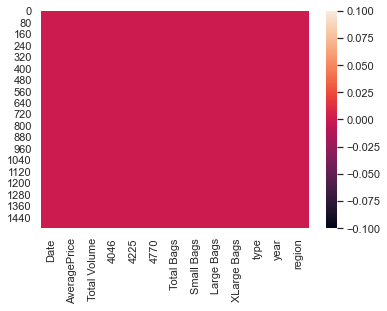

In [148]:
sns.heatmap(ava_df.isnull())

from the both heat map and null check as we find there are no null values in the data set because the red color is distributed equally entire the heatmap.

### Processing date Column

In [149]:
ava_df['Date']=pd.to_datetime(ava_df['Date'])
ava_df['Month']=ava_df['Date'].apply(lambda x:x.month)
ava_df['Day']=ava_df['Date'].apply(lambda x:x.day)

Here created seperate columns for year, month, day. So dropping Date column

In [150]:
ava_df.drop(['Date'],axis=1,inplace=True)

### Processing Categorical Variable

from the given data we can find that type column is a categorical data, so we need to convert this into numerical

to convert the categorical values into numerical values, we should find the unique value in the entire column

In [151]:
ava_df['type'].unique()

array(['conventional'], dtype=object)

In [152]:
ava_df['type'] = ava_df['type'].map({
    'conventional': 1
}.get)

In [153]:
ava_df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,1,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,1,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,1,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,1,2015,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,1,2015,Albany,11,29


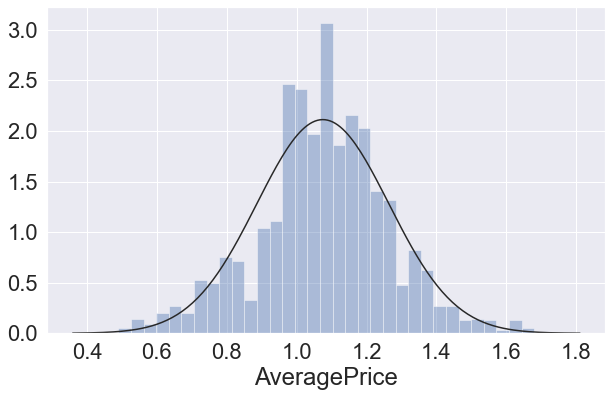

In [154]:
sns.set(font_scale=2) 
fig, ax = plt.subplots(figsize=(10, 6))
sns.distplot(a=ava_df.AveragePrice, kde=False, fit=norm)

most price of Average Price of avacado distribution showing between 1, 1.2.

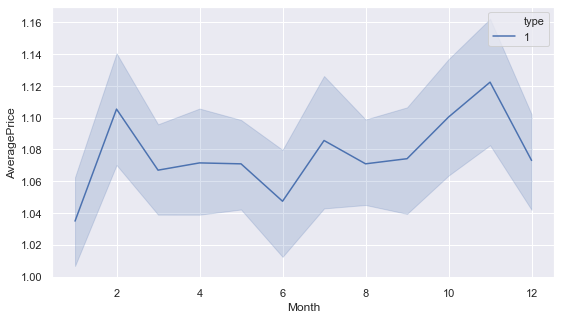

In [155]:
sns.set(font_scale=1) 
plt.figure(figsize=(9,5))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=ava_df)
plt.show()

observed there was a hike between months 0-2 and 10 – 12 for Conventional type(1) of Avocados prices

## statistical summary

In [156]:
ava_df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.0,1517.000000,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,1.0,2015.162821,6.362558,15.253790
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.0,0.369324,3.472146,8.965902
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,1.0,2015.000000,1.000000,1.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,1.0,2015.000000,3.000000,7.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,1.0,2015.000000,6.000000,15.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,1.0,2015.000000,9.000000,22.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,1.0,2016.000000,12.000000,31.000000


statistics data shows that outliers are mostly in XLargeBags

There are some columns are having high difference between mean and 50% value those are used to get fix for better prediction

Number of rows in each column are same, means there are no null values in given data

The difference between the 75% and max value there are outliers in some of the column, we need to check.

## Data Visuvalization

##### Comparing year and price to check which year avacado has highest average price

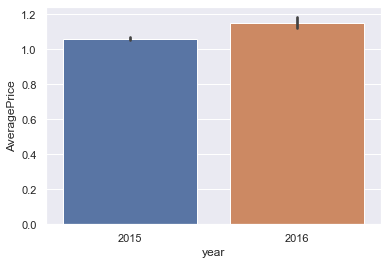

In [157]:
sns.barplot(x= 'year', y = 'AveragePrice', data = ava_df)

The graph showing 2016 year has high average price compared to 2015

##### Comparing month and price to check which month avacado has highest average price

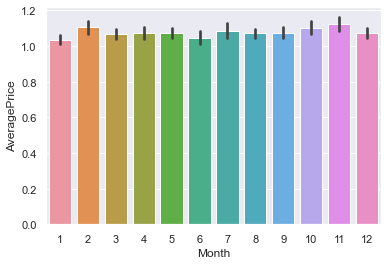

In [158]:
sns.barplot(x= 'Month', y = 'AveragePrice', data = ava_df)

Almost for whole year the price is almost same for the avocado this prove that there is so much craze of avocado in USA.

Even that case also Feb and Nov are the month where max no of average price is there.

##### Comparing Day and price to check avacado's average price changes day by day in a month

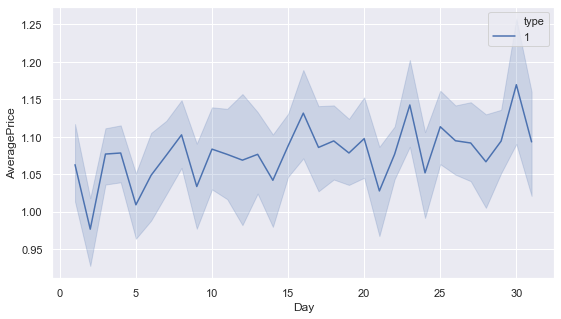

In [159]:
sns.set(font_scale=1) 
plt.figure(figsize=(9,5))
#sns.barplot(x= 'Day', y = 'AveragePrice', data = ava_df)

sns.lineplot(x="Day", y="AveragePrice", hue='type', data=ava_df)
plt.show()

We can See that there is significan hike in average price at the month end till 30day

## Deal with Skewness

In [160]:
ava_df.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
type            0.000000
year            1.828332
Month           0.101439
Day             0.041303
dtype: float64

skew value is more than or equal to 0.55, which means it has to be skewed to less than or equal to 0.55

Making the skew less than or equal to 0.55 for better prediction and plotting Normal distribution

In [161]:
skew_val = ("Total Volume",'4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags')
for col in skew_val:
    if ava_df.skew().loc[col]>0.55:
        ava_df[col]= np.log1p(ava_df[col])

In [162]:
ava_df.skew()

AveragePrice   -0.109444
Total Volume    0.667468
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.695502
Small Bags      0.713843
Large Bags     -0.912766
XLarge Bags     0.783913
type            0.000000
year            1.828332
Month           0.101439
Day             0.041303
dtype: float64

In [163]:
ava_df.skew()

AveragePrice   -0.109444
Total Volume    0.667468
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.695502
Small Bags      0.713843
Large Bags     -0.912766
XLarge Bags     0.783913
type            0.000000
year            1.828332
Month           0.101439
Day             0.041303
dtype: float64

We can see the difference between the first skewed data and second skewed data, now the skewness value is very nearer to zero which will help to get the better score

## Label Encoding

In [164]:
ava_df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int64
year              int64
region           object
Month             int64
Day               int64
dtype: object

In [165]:
#creating new dataframe contains object datatype to encoding purpose
obj_df = ava_df.select_dtypes(include=['object']).copy()

In [166]:
Le = LabelEncoder()
obj_df["region_label"] = Le.fit_transform(obj_df["region"])
obj_df[["region", "region_label"]].head(100)

,region,region_label
0,Albany,0
1,Albany,0
2,Albany,0
3,Albany,0
4,Albany,0
...,...,...
95,BaltimoreWashington,2
96,BaltimoreWashington,2
97,BaltimoreWashington,2
98,BaltimoreWashington,2


Region coulmn has multiple values to encoding, so we used label encoder to get it done

In [167]:
ava_df.drop('region', axis = 1, inplace=True)
ava_df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,1,2015,12,27
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,1,2015,12,20
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,1,2015,12,13
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,1,2015,6,12
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,1,2015,11,29


In [168]:
ava_df = pd.concat([ava_df, obj_df], axis=1)
ava_df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day,region,region_label
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,1,2015,12,27,Albany,0
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,1,2015,12,20,Albany,0
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,1,2015,12,13,Albany,0
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,1,2015,6,12,Albany,0
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,1,2015,11,29,Albany,0


In [169]:
ava_df.drop('region', axis = 1, inplace=True)
ava_df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day,region_label
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,1,2015,12,27,0
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,1,2015,12,20,0
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,1,2015,12,13,0
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,1,2015,6,12,0
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,1,2015,11,29,0


## Deal with Outliers

###### To get outlier details we use boxplot for each column

AveragePrice        AxesSubplot(0.125,0.71587;0.133621x0.16413)
Total Volume     AxesSubplot(0.285345,0.71587;0.133621x0.16413)
4046              AxesSubplot(0.44569,0.71587;0.133621x0.16413)
4225             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4770             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Total Bags         AxesSubplot(0.125,0.518913;0.133621x0.16413)
Small Bags      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Large Bags       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
XLarge Bags     AxesSubplot(0.606034,0.518913;0.133621x0.16413)
type            AxesSubplot(0.766379,0.518913;0.133621x0.16413)
year               AxesSubplot(0.125,0.321957;0.133621x0.16413)
Month           AxesSubplot(0.285345,0.321957;0.133621x0.16413)
Day              AxesSubplot(0.44569,0.321957;0.133621x0.16413)
region_label    AxesSubplot(0.606034,0.321957;0.133621x0.16413)
dtype: object

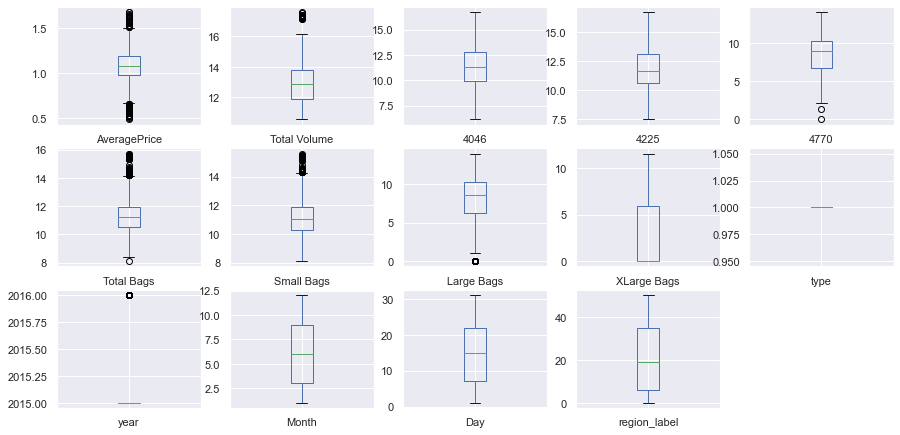

In [170]:
ava_df.plot(kind = 'box', subplots = True, layout = (4,5), figsize= (15,10))

From the above box plots, we can observe outliers in some columns like "Average Price, Total Volume, Total Bags, Small Bags" as black dots in charts

We need to remove these outlier values from data to get best score, for this we are using ZSCORE methode

##### Zscore calculation to identify outlier values

In [171]:
z_score = np.abs(stats.zscore(ava_df))
print(z_score)

[[1.35048079 1.35676174 1.82816171 ... 1.62415427 1.31052998 1.3143384 ]
 [1.45639674 1.46638736 2.01206913 ... 1.62415427 0.52953678 1.3143384 ]
 [0.76783831 0.9321394  1.94183376 ... 1.62415427 0.25145642 1.3143384 ]
 ...
 [2.14485045 0.64565294 0.20190426 ... 1.25685839 0.58616779 0.88028586]
 [2.09189247 0.60503087 0.13577946 ... 0.75985047 1.08738906 0.88028586]
 [1.88006056 0.62805557 0.23299293 ... 0.75985047 0.30639586 0.88028586]]


In [172]:
threshold = 3
print(np.where(z_score > 3))

(array([ 760, 1182, 1182, 1182, 1183, 1183, 1183, 1184, 1184, 1184, 1185,
       1185, 1185, 1186, 1186, 1186, 1187, 1188, 1188, 1188, 1189, 1189,
       1191, 1202, 1346, 1411, 1457, 1458], dtype=int64), array([0, 1, 5, 6, 1, 5, 6, 1, 5, 6, 1, 5, 6, 1, 5, 6, 6, 1, 5, 6, 1, 5,
       5, 1, 4, 0, 0, 0], dtype=int64))


Using threshold values 3, we can identify 15 number of outliers and above are the indices of that 15 number of outliers

###### Removing Outliers based on threshold value

In [173]:
ava_df_z = ava_df[z_score>3]
ava_df_z = ava_df_z[~ava_df_z.index.duplicated(keep='first')]
ava_df_new = pd.concat([ava_df, ava_df_z, ava_df_z]).drop_duplicates(keep=False)

In [174]:
print(ava_df.shape)
print(ava_df_new.shape)

(1517, 14)
(1502, 14)


We can see the difference between two dataframes, i.e., shape of the dataframe with outliers(ava_df) and shape of the dataframe without outliers(ava_df_new) there was 15 rows removed as outliers

## Analyzing Correlation Matrix

###### Correlation of all column to eachother

[]

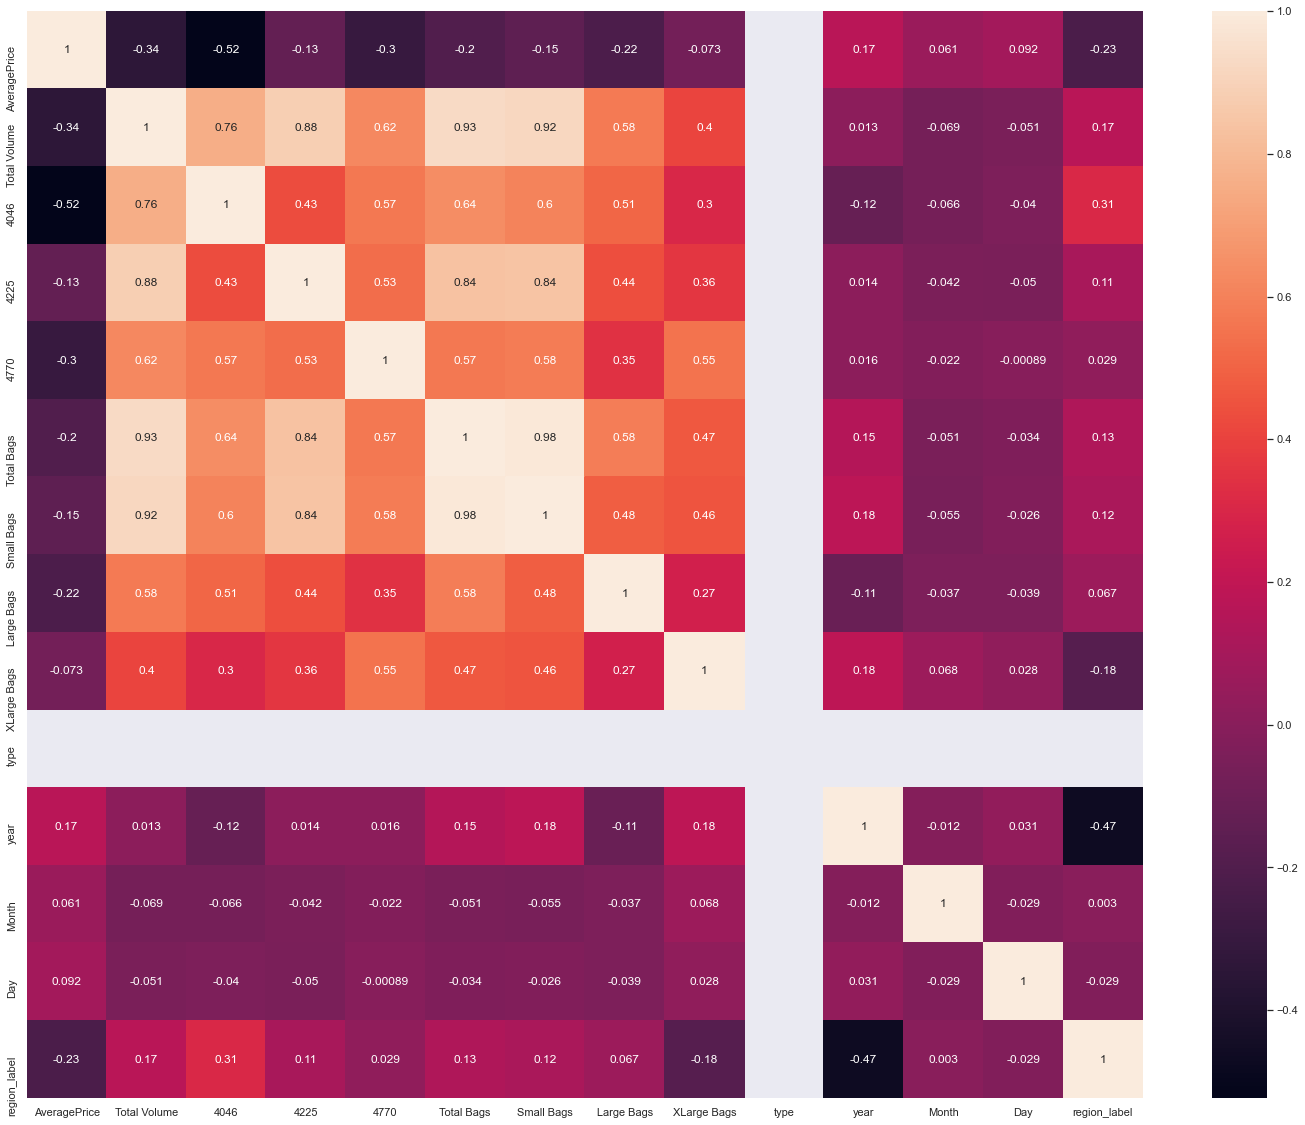

In [175]:
ava_df_cor = ava_df_new.corr()
plt.figure(figsize=(25,20))
sns.heatmap(ava_df_cor, annot=True)
plt.plot()

From the above heatmap, most the value is positive means that columns are much co related

## Standard scaling of data

###### Now divide the dataset into two types one is input and another is output

In [176]:
df_x = ava_df_new.drop(columns=['AveragePrice','Month','Day'])

In [177]:
y = ava_df_new['AveragePrice']

In [178]:
#converting the input into integers using get_dummies
df_x=pd.get_dummies(df_x,drop_first=True)

df_x.shape

(1502, 11)

In [179]:
#Scaling data set
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
x=sc.transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region_label
0,-1.375936,-1.840250,-0.561839,-1.826955,-1.712839,-1.562485,-0.959979,-0.804932,0.0,-0.439329,-1.313068
1,-1.488857,-2.027012,-0.681143,-1.752789,-1.646316,-1.496328,-0.947025,-0.804932,0.0,-0.439329,-1.313068
2,-0.938549,-1.955687,-0.144473,-1.438870,-1.761857,-1.612428,-0.930605,-0.804932,0.0,-0.439329,-1.313068
3,-1.227667,-1.802077,-0.394396,-1.667886,-2.014484,-1.870139,-0.854726,-0.804932,0.0,-0.439329,-1.313068
4,-1.540837,-1.882102,-0.692004,-1.651095,-1.967967,-1.830934,-0.740434,-0.804932,0.0,-0.439329,-1.313068
...,...,...,...,...,...,...,...,...,...,...,...
1497,-0.595137,-0.094975,-0.541127,0.490978,-0.275016,-0.277526,0.423399,0.779701,0.0,2.276196,-0.876514
1498,-0.644155,-0.218216,-0.587341,0.531313,-0.227658,-0.193345,0.368629,-0.804932,0.0,2.276196,-0.876514
1499,-0.643451,-0.188752,-0.579301,0.472679,-0.238192,-0.212140,0.356808,1.135174,0.0,2.276196,-0.876514
1500,-0.601608,-0.121601,-0.571408,0.490160,-0.220236,-0.180610,0.357524,-0.804932,0.0,2.276196,-0.876514


# MODEL Preperation

## Prediction with AveragePrice

##### Now by using multiple algorithms to get the best algorithm which suit best for out dataset

In [180]:
Model = [DecisionTreeRegressor(), KNeighborsRegressor(), AdaBoostRegressor(), LinearRegression(), GradientBoostingRegressor()]
max_r2_score = 0
for r_state in range(40,90):
    train_x, test_x, train_y, test_y = train_test_split(x,y,random_state = r_state,test_size = 0.33)
    for i in Model:
        i.fit(train_x,train_y)
        pre = i.predict(test_x)
        r2_sc= r2_score(test_y,pre)
        print('R2 score correspond to random state ' , r_state, 'is ' , r2_sc)
        if r2_sc> max_r2_score:
            max_r2_score=r2_sc
            final_state = r_state
            final_model = i
            
print()
print()
print()
print()
print('max R2 score correspond to random state ' , final_state, 'is ', max_r2_score, " and model is ", final_model)


R2 score correspond to random state  40 is  0.6734139707059879
R2 score correspond to random state  40 is  0.7482301062493153
R2 score correspond to random state  40 is  0.617629515572091
R2 score correspond to random state  40 is  0.4158311431659163
R2 score correspond to random state  40 is  0.7461892561931116
R2 score correspond to random state  41 is  0.6830867474462884
R2 score correspond to random state  41 is  0.745407872145881
R2 score correspond to random state  41 is  0.6387634181328292
R2 score correspond to random state  41 is  0.3821795123385472
R2 score correspond to random state  41 is  0.7438469334022391
R2 score correspond to random state  42 is  0.6517007821316112
R2 score correspond to random state  42 is  0.7821766456123737
R2 score correspond to random state  42 is  0.6330444588666564
R2 score correspond to random state  42 is  0.4196809196147627
R2 score correspond to random state  42 is  0.7188768893069337
R2 score correspond to random state  43 is  0.64700201674

R2 score correspond to random state  66 is  0.6300379879678184
R2 score correspond to random state  66 is  0.39025249452099386
R2 score correspond to random state  66 is  0.7447591622266554
R2 score correspond to random state  67 is  0.6324275650460143
R2 score correspond to random state  67 is  0.7156936158902113
R2 score correspond to random state  67 is  0.5863878904651585
R2 score correspond to random state  67 is  0.4044429431044939
R2 score correspond to random state  67 is  0.7263501719342238
R2 score correspond to random state  68 is  0.6317855199592304
R2 score correspond to random state  68 is  0.7521605802240926
R2 score correspond to random state  68 is  0.5902471460789278
R2 score correspond to random state  68 is  0.3784457366242966
R2 score correspond to random state  68 is  0.7140598832893414
R2 score correspond to random state  69 is  0.6561821535179542
R2 score correspond to random state  69 is  0.7121414968391038
R2 score correspond to random state  69 is  0.61753847

using the above forloop, we came to know that the best algorithm is KNeighborsRegressor because the max R2 score corresponds to the randomstate meets for the model KNeighborsRegressor

#### Identifying the best parameter for prediction of KNeighborsRegressor using GridSearchCV

In [181]:
train_x, test_x, train_y, test_y = train_test_split(x,y,random_state = 43,test_size = 0.33)
KN = KNeighborsRegressor()
parameters = {'n_neighbors' : range(1,30)}
gridsearch = GridSearchCV(KN, parameters)
gridsearch.fit(train_x, train_y)
gridsearch.best_params_

{'n_neighbors': 2}

In [182]:
KNR= KNeighborsRegressor(n_neighbors=2)
KNR.fit(train_x, train_y)
Kn_pred = KNR.predict(test_x)
r2_sc = r2_score(test_y, Kn_pred)
print("R2_score :", r2_sc*100)

R2_score : 82.3777757475462


In [183]:
print('Mean Absolute Error', mean_absolute_error(test_y, Kn_pred))
print('Mean Squared Error', mean_squared_error(test_y,Kn_pred))
print('Root Mean Absolute Error', np.sqrt(mean_absolute_error(test_y, Kn_pred)))

Mean Absolute Error 0.060655241935483876
Mean Squared Error 0.006900352822580646
Root Mean Absolute Error 0.24628284945461362


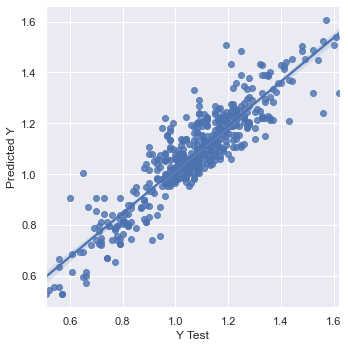

In [184]:
#plt.scatter(x=test_y, y=Kn_pred)
data = pd.DataFrame({'Y Test':test_y , 'Predicted Y':Kn_pred},columns=['Y Test','Predicted Y'])
sns.lmplot(x='Y Test',y='Predicted Y',data=data,palette='rainbow')

#plt.xlabel('y_test')
#plt.ylabel('predicted_y')

## Observations in Prediction with Average Price

In this prediction by taking average price as an output variable
average price has continuity in nature, so I used the regression model

While calculating the best random state the 43 is best state and providing the max R2 score value for this regression

From GridSeachCV, I can find the best param and then used these param to this model

Using the best param we can get the best R2 score and the model is KNeighboursRegressor

I have plot the scatter plot graph and we can see that the actual value and predicted values are very close to each other, so the line is best fit line.

## Prediction with Region

#### Try to get the score by taking region as an y value, for this using classification method because the region data is categorical in nature

###### Now divide the dataset into two types one is input and another is output

In [185]:
df_x = ava_df_new.drop(columns=['region_label','Month','Day'])
df_y = ava_df_new['region_label']
print(df_x.shape)
print(y.shape)

(1502, 11)
(1502,)


In [186]:
#Scaling data set
sc=StandardScaler()
sc.fit(df_x)
x=sc.transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,1.365422,-1.375936,-1.840250,-0.561839,-1.826955,-1.712839,-1.562485,-0.959979,-0.804932,0.0,-0.439329
1,1.472497,-1.488857,-2.027012,-0.681143,-1.752789,-1.646316,-1.496328,-0.947025,-0.804932,0.0,-0.439329
2,-0.776081,-0.938549,-1.955687,-0.144473,-1.438870,-1.761857,-1.612428,-0.930605,-0.804932,0.0,-0.439329
3,0.026983,-1.227667,-1.802077,-0.394396,-1.667886,-2.014484,-1.870139,-0.854726,-0.804932,0.0,-0.439329
4,1.097734,-1.540837,-1.882102,-0.692004,-1.651095,-1.967967,-1.830934,-0.740434,-0.804932,0.0,-0.439329
...,...,...,...,...,...,...,...,...,...,...,...
1497,1.686648,-0.595137,-0.094975,-0.541127,0.490978,-0.275016,-0.277526,0.423399,0.779701,0.0,2.276196
1498,2.329099,-0.644155,-0.218216,-0.587341,0.531313,-0.227658,-0.193345,0.368629,-0.804932,0.0,2.276196
1499,2.168486,-0.643451,-0.188752,-0.579301,0.472679,-0.238192,-0.212140,0.356808,1.135174,0.0,2.276196
1500,2.114948,-0.601608,-0.121601,-0.571408,0.490160,-0.220236,-0.180610,0.357524,-0.804932,0.0,2.276196


Now we are taking region as y variable and predict using clasification

##### Now by using multiple algorithms to get the best algorithm which suit best for out dataset

In [187]:
Model = [DecisionTreeClassifier(), KNeighborsClassifier()]
max_accuracy_score = 0
for r_state in range(40,90):
    train_xc, test_xc, train_yc, test_yc = train_test_split(df_x,df_y,random_state = r_state,test_size = 0.33)
    for i_c in Model:
        i_c.fit(train_xc,train_yc)
        pre_c = i_c.predict(test_xc)
        ac_sc= accuracy_score(test_yc,pre_c)
        print('accuracy score correspond to random state ' , r_state, 'is ' , ac_sc)
        if ac_sc> max_accuracy_score:
            max_accuracy_score=ac_sc
            final_state = r_state
            final_model = i_c
            
print()
print()
print()
print()
print('max accuracy score correspond to random state ' , final_state, 'is ', max_accuracy_score, " and model is ", final_model)

accuracy score correspond to random state  40 is  0.8508064516129032
accuracy score correspond to random state  40 is  0.8911290322580645
accuracy score correspond to random state  41 is  0.8770161290322581
accuracy score correspond to random state  41 is  0.8588709677419355
accuracy score correspond to random state  42 is  0.8326612903225806
accuracy score correspond to random state  42 is  0.8870967741935484
accuracy score correspond to random state  43 is  0.8991935483870968
accuracy score correspond to random state  43 is  0.8669354838709677
accuracy score correspond to random state  44 is  0.8770161290322581
accuracy score correspond to random state  44 is  0.8891129032258065
accuracy score correspond to random state  45 is  0.875
accuracy score correspond to random state  45 is  0.8991935483870968
accuracy score correspond to random state  46 is  0.842741935483871
accuracy score correspond to random state  46 is  0.8689516129032258
accuracy score correspond to random state  47 is

using the above forloop, we came to know that the best algorithm is KNeighborsClassifier because the max R2 score corresponds to the randomstate meets for the model KNeighborsClassifier

#### Identifying the best parameter for prediction of KNeighborsRegressor using GridSearchCV

In [188]:
train_xc, test_xc, train_yc, test_yc = train_test_split(df_x,df_y,random_state = 77,test_size = 0.33)
KN = KNeighborsClassifier()
parameters = {'n_neighbors' : range(1,30)}
gridsearch = GridSearchCV(KN, parameters)
gridsearch.fit(train_xc, train_yc)
gridsearch.best_params_

{'n_neighbors': 1}

In [189]:
KNC= KNeighborsRegressor(n_neighbors=1)
KNC.fit(train_xc, train_yc)
Kn_pred = KNC.predict(test_xc)
ac_sc = accuracy_score(test_yc, Kn_pred)
print("Accuracy Score :", ac_sc*100)

Accuracy Score : 95.56451612903226


###### calculating the scores of different parameters

In [190]:
score = cross_val_score(KNC, df_x, df_y, cv=100, scoring = 'accuracy').mean()
print('Cross_val_score : ', score*100)
print('Mean Score : ', score.mean()*100)
print( 'STD Score : ', score.std())

Cross_val_score :  80.35416666666667
Mean Score :  80.35416666666667
STD Score :  0.0


In [199]:
import joblib
svc=svm.SVC()
joblib.dump(svc, "Avacado_dataset_svm.pkl")

['Avacado_dataset_svm.pkl']

## Observations in Prediction with Average Price

While calculating the best random state the 77 is best state and providing the best accuracy score for the model which is 92%

Using the GridSeachCV, We can find the best param and then find the best accuracy score that is 95%

## Conclusion and observations in  this Data

For this data set used both regression and classification technique for making this model

Prediction using region and Average price but using Region the prediction score is high as compared to average price

there was a hike between months 0-2 and 10 – 12 for Conventional type(0) of Avocados prices

there is significant hike in average price at the month end till 30day

There are no outliers in the data set after removing those using zscore

R2 score value is lessthan then accuracy score